# 1. Import Required Libraries

In [4]:
import pandas as pd
import nltk
from textblob import TextBlob
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load News and Stock Data

In [5]:
news_df = pd.read_csv('../data/processed/cleaned_analyst_ratings.csv')  
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

stock_df = pd.read_csv('../data/processed/AAPL_indicators.csv')
stock_df['date'] = pd.to_datetime(stock_df['Date']).dt.date
stock_df = stock_df[['date', 'Close']].sort_values('date')


# 3. Perform Sentiment Analysis on Headlines

In [7]:
news_df['sentiment'] = news_df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()


# 4. Calculate Daily Stock Returns

In [8]:
stock_df['daily_return'] = stock_df['Close'].pct_change()

# 5. Merge Datasets on Date

In [9]:
merged_df = pd.merge(daily_sentiment, stock_df, on='date', how='inner')
merged_df.dropna(inplace=True)

# 6. Perform Correlation Analysis

In [10]:
correlation, p_value = pearsonr(merged_df['sentiment'], merged_df['daily_return'])
print(f"Pearson correlation: {correlation:.4f}, p-value: {p_value:.4f}")


Pearson correlation: -0.0020, p-value: 0.9236


# 7. Visualize the Correlation

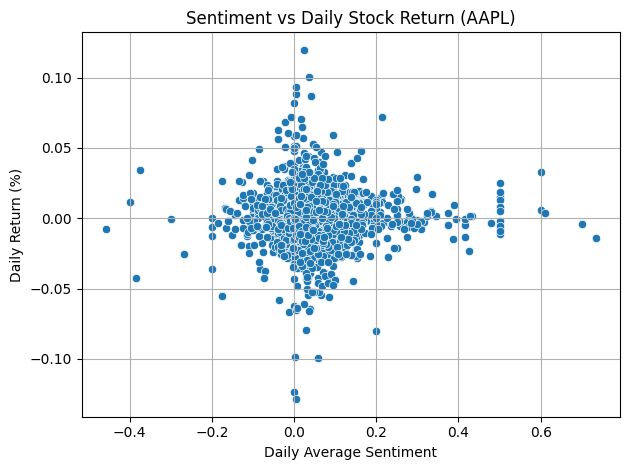

In [12]:
sns.scatterplot(x='sentiment', y='daily_return', data=merged_df)
plt.title('Sentiment vs Daily Stock Return (AAPL)')
plt.xlabel('Daily Average Sentiment')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
